# Exploração dos dados de acesso ao Instituto

In [172]:
#importação bibliotecas e pacotes

import pandas as pd
import numpy as np
import statistics

import seaborn as sns
import matplotlib.pyplot as plt

# Analise e normalização dos dados

In [119]:
df = pd.read_excel('dataset_acesso_instituto.xlsx')
df.head()

,NR_FICHA,TP_ATENDIMENTO,NR_CONTROLE,CD_PESSOA,DT_ENTRADA,HR_ENTRADA,DS_TURNO,DS_DIA_SEMANA,DT_SAIDA,HR_SAIDA,IE_SEXO,QT_IDADE_ANOS,DS_TIPO,DS_SETOR,NM_PAIS,SG_ESTADO,DS_MUNICIPIO
0,10445229.0,Autoatendimento,20000164,1522000,03/01/2022,06:24:38,Manhã,segunda-feira,03/01/2022,11:45:24,F,50,Acompanhante,Serviços Especiais,NaN,NaN,NaN
1,10445232.0,Autoatendimento,20000166,1573724,03/01/2022,06:25:35,Manhã,segunda-feira,03/01/2022,13:54:10,F,62,Acompanhante,Serviços Especiais,NaN,NaN,NaN
2,10445246.0,Autoatendimento,20000168,1472491,03/01/2022,06:26:34,Manhã,segunda-feira,03/01/2022,23:59:59,F,37,Acompanhante,Serviços Especiais,NaN,NaN,NaN
3,10445812.0,Outros,41143667,1547149,03/01/2022,08:12:09,Manhã,segunda-feira,03/01/2022,10:34:48,NaN,50,Acompanhante,Serviços Especiais,NaN,NaN,NaN
4,10445888.0,Outros,41143889,1582486,03/01/2022,08:24:04,Manhã,segunda-feira,03/01/2022,23:59:59,F,34,Acompanhante,Serviços Especiais,NaN,NaN,NaN


In [120]:
df.shape

(871995, 17)

In [123]:
#extraindo o mês da data
df['MES'] = pd.DatetimeIndex(df['DT_ENTRADA']).month

In [124]:
#alterando valor coluna mês para descritivo
ds_mes = []
for i in df['MES'].values:
    if i == 1:
        ds_mes.append('Janeiro')
    elif i == 2:
        ds_mes.append('Fevereiro')
    elif i == 3:
        ds_mes.append('Março')
    elif i == 4:
        ds_mes.append('Abril')
    elif i == 5:
        ds_mes.append('Maio')
    elif i == 6:
        ds_mes.append('Junho')
    elif i == 7:
        ds_mes.append('Julho')
    elif i == 8:
        ds_mes.append('Agosto')
    elif i == 9:
        ds_mes.append('Setembro')
    elif i == 10:
        ds_mes.append('Outubro')
    elif i == 11:
        ds_mes.append('Novembro')
    elif i == 12:
        ds_mes.append('Dezembro')
        
df['DS_MES'] = ds_mes

In [125]:
#incluindo a conluna DS_TIPO2
ds_tipo2 = []
for i in df['DS_TIPO'].values:
    if i != 'Acompanhante' and i != 'Cliente':
        ds_tipo2.append('Visitante')
    else:
        ds_tipo2.append(i)

df['DS_TIPO2'] = ds_tipo2

In [126]:
#verificando os tipos de dados e apresença de NAs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871995 entries, 0 to 871994
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   NR_FICHA        871959 non-null  float64
 1   TP_ATENDIMENTO  871995 non-null  object 
 2   NR_CONTROLE     871995 non-null  int64  
 3   CD_PESSOA       871995 non-null  int64  
 4   DT_ENTRADA      871995 non-null  object 
 5   HR_ENTRADA      871995 non-null  object 
 6   DS_TURNO        871995 non-null  object 
 7   DS_DIA_SEMANA   871995 non-null  object 
 8   DT_SAIDA        871968 non-null  object 
 9   HR_SAIDA        871968 non-null  object 
 10  IE_SEXO         853584 non-null  object 
 11  QT_IDADE_ANOS   871995 non-null  int64  
 12  DS_TIPO         871995 non-null  object 
 13  DS_SETOR        871927 non-null  object 
 14  NM_PAIS         480036 non-null  object 
 15  SG_ESTADO       487062 non-null  object 
 16  DS_MUNICIPIO    486891 non-null  object 
 17  MES       

In [127]:
#eliminando valores NAs da coluna IE_SEXO com valor da MODA
df['IE_SEXO'] = df['IE_SEXO'].replace(to_replace = np.nan, value = statistics.mode(df['IE_SEXO']))

In [128]:
#eliminando valores NAs da coluna DS_SETOR com valor da MODA
df['DS_SETOR'] = df['DS_SETOR'].replace(to_replace = np.nan, value = statistics.mode(df['DS_SETOR']))

In [129]:
#eliminando valores NAs da coluna HR_SAIDA com valor '23:59:59'
df['HR_SAIDA'] = df['HR_SAIDA'].replace(to_replace = np.nan, value = '23:59:59')

In [130]:
#eliminando valores NAs da coluna HR_SAIDA com valores da coluna DT_ENTRADA
df['DT_SAIDA'].fillna(df['DT_ENTRADA'], inplace=True)

In [131]:
#ordenacao das colunas e retirada das colunas ID's
colunas_ordenadas = ['TP_ATENDIMENTO', 'DT_ENTRADA', 'HR_ENTRADA', 'DS_TURNO', 'DS_MES', 'DS_DIA_SEMANA', 'DT_SAIDA', 'HR_SAIDA',
       'IE_SEXO', 'QT_IDADE_ANOS', 'DS_TIPO2', 'DS_SETOR', 'NM_PAIS', 'SG_ESTADO', 'DS_MUNICIPIO']

In [132]:
df = df[colunas_ordenadas]

In [133]:
df.head()

,TP_ATENDIMENTO,DT_ENTRADA,HR_ENTRADA,DS_TURNO,DS_MES,DS_DIA_SEMANA,DT_SAIDA,HR_SAIDA,IE_SEXO,QT_IDADE_ANOS,DS_TIPO2,DS_SETOR,NM_PAIS,SG_ESTADO,DS_MUNICIPIO
0,Autoatendimento,03/01/2022,06:24:38,Manhã,Março,segunda-feira,03/01/2022,11:45:24,F,50,Acompanhante,Serviços Especiais,NaN,NaN,NaN
1,Autoatendimento,03/01/2022,06:25:35,Manhã,Março,segunda-feira,03/01/2022,13:54:10,F,62,Acompanhante,Serviços Especiais,NaN,NaN,NaN
2,Autoatendimento,03/01/2022,06:26:34,Manhã,Março,segunda-feira,03/01/2022,23:59:59,F,37,Acompanhante,Serviços Especiais,NaN,NaN,NaN
3,Outros,03/01/2022,08:12:09,Manhã,Março,segunda-feira,03/01/2022,10:34:48,F,50,Acompanhante,Serviços Especiais,NaN,NaN,NaN
4,Outros,03/01/2022,08:24:04,Manhã,Março,segunda-feira,03/01/2022,23:59:59,F,34,Acompanhante,Serviços Especiais,NaN,NaN,NaN


# Analise gráfica dos dados

In [ ]:
#verificando o mês com mais visitas

<AxesSubplot:xlabel='DS_MES', ylabel='Count'>

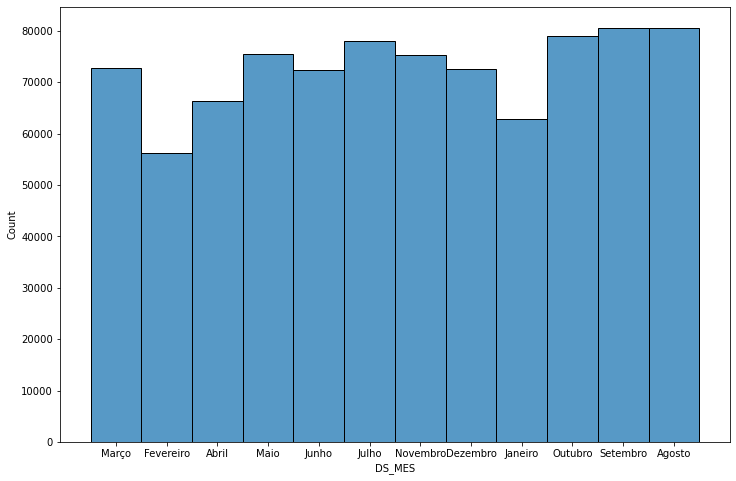

In [262]:
plt.subplots(figsize=(12, 8))

sns.histplot(data=df, x='DS_MES')

In [177]:
#filtrando somente os registros de Agosto
acesso_mes_agosto = df[(df['DS_MES'] == 'Agosto')]

In [205]:
quant_acesso_ds = acesso_mes_agosto.groupby('DS_DIA_SEMANA').count()['TP_ATENDIMENTO']

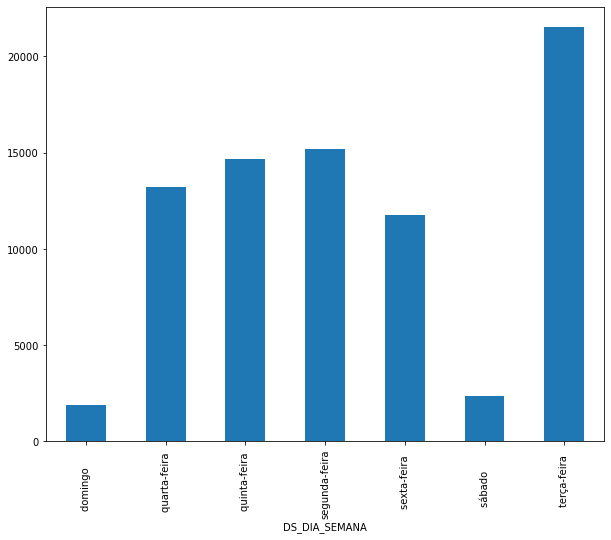

In [260]:
#quantidade de acesso por dias da semana, do mês com maior quantidade de acesso
plt.subplots(figsize=(10, 8))

quant_acesso_ds.plot(kind='bar');

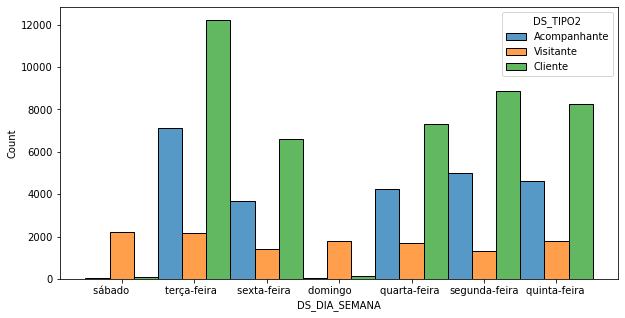

In [252]:
#quantidade de visitas no dia da semana por tipo
plt.subplots(figsize=(10, 5))

sns.histplot(data=acesso_mes_agosto, x='DS_DIA_SEMANA', hue='DS_TIPO2', multiple="dodge");

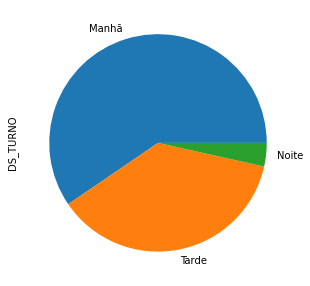

In [267]:
#proporção de visitas por turno
plt.subplots(figsize=(10, 5))

df['DS_TURNO'].value_counts().plot(kind='pie');